# Biological Signals Analysis - Week 2 Exercise
### Created by Guy Singer | Jan. 10, 2024
### Table of Contents:
- [Sampling in Time: Introduction](#Sampling-in-Time)
- [Using Dirac's Delta Function for Sampling](#diracs-delta)
- [Approximating Dirac's Delta with a Narrow Gaussian](#dirac-gaussian)
- [Python Example - Dirac's Delta Function](#dirac-python)
- [Introduction to Fourier Analysis](#fourier-intro)
- [Orthogonality in Fourier Analysis](#orthogonality)
- [Fourier Series](#fourier-series)
- [Even and Odd Functions](#even-odd)
- [Discreet Fourier Transform](#discreet-FT)
- [Example: EEG Data](#EEG-Example)

### Sampling in Time <a name="Sampling-in-Time"></a>

In many scenarios, a continuous signal must be represented as a discreet signal to be amenable for analysis.
  - **Continuous (Analog) Signal**: Composed of an uninterrupted signal. Can be represented mathematically as a function that is defined over some interval, which has data for every single point along this interval.
  - **Discreet (Digital) Signal**: Composed of a finite number of discrete values. Can be represented mathematically as a sequence of numbers, which are data for specified points along the time interval.

Many biological signals are continuous. For example, the membrane voltage of a neuron has a continuous value. When measuring this voltage with an electrode, the values of current and voltage measured by the electrode are also continuous. **However, as soon as we observe these values, we have to sample them.** Whenever we observe the electrode's values, we are sampling the values at a specific point along the time interval. Expressed mathematically, we define:

(1) &emsp; *Sampling Interval:* &emsp;  $ T_s $

(2) &emsp; *Sampling Frequency:*  &emsp; $ F_s = f_s = 1/T_s $

Given an **analog** signal &nbsp; $x_{analog} = x(n)$,&nbsp; where $n$ represents time (or any other independent variable), we can sample the signal into discret values and represent the $n^{th}$ value as $x[n]$. The set of all discreete values can be expressed as:

(3) &emsp; $ x = x[n] $&emsp;:&emsp;$ -\infty < n < \infty $&emsp;:&emsp;$ where $ &nbsp; $ n \in \mathbb{Z} $

As such, to sample the analog data and create a digital representation, the following definition holds:

(4) &emsp; $ x[n] = x_{analog}(nT_s) $&emsp;:&emsp;$ -\infty < n < \infty $&emsp;:&emsp;$ where $ &nbsp; $ n \in \mathbb{Z} $

**Note:** $n$ can be either a single sample or a sequence of samples.



### Using Dirac's Delta Function for Sampling <a name="diracs-delta"></a>

The **Dirac Delta Function**, denoted as $\delta(x)$, was introduced by the physicist Paul Dirac and provides a theoretical foundation for the process of converting a continuous signal into a discrete one. When dealing with continuous signals in the frequency domain, $\delta(x)$ simplifies analysis significantly. In Fourier transforms (covered further down in this notebook), it allows for the straightforward transformation of time-domain signals into frequency-domain representations. This simplification is crucial for analyzing and processing signals in various life science applications.

$\delta(x)$ is not a function in the traditional sense, but rather a *distribution* or a *generalized function*. It is a theoretical construct that is infinitely high at $x = 0$, zero everywhere else, and has an integral of 1 over its entire range.

$\delta(x)$ is thus defined by the following properties:

**Zero Everywhere Except at Zero:**

   $\delta(x) = 0 \quad \text{for all } x \neq 0$

**Integral Property:**

   $\int_{-\infty}^{\infty} \delta(x) \, dx = 1$

This means that the function has an "infinite" peak at \(x = 0\) such that its integral over the entire real line is equal to 1.
$\delta(x)$ is often visualized as a peak at zero with zero width but an area of 1, although this is just a conceptual representation, as the function itself cannot be expressed in a standard graphical form.

From these properties, we can derive the following properties:

   $\delta(x-k) = 0 \quad \text{ :  } $&emsp;$ x \neq k$
   
   $\delta(x-k) = 1 \quad \text{ :  } $&emsp;$ x = k$

In other words, when a continuous function is multiplied by $\delta(x)$, the result isolates the value of the continuous function at the point where $\delta(x)$ is centered. This is the key concept behind using $\delta(x)$ for sampling a continuous function: the ability to 'pick out' the value of a function at a specific point.

Consider a continuous function $f(t)$, where $a$ is the point of interest. The product of these functions is:

$ f(t) \cdot \delta(t - a) $

Integrating this product over all $t$ yields the value of $f(t)$ at $t = a$:

$ \int_{-\infty}^{\infty} f(t) \cdot \delta(t - a) \, dt = f(a) $

This integral evaluates to $f(a)$ because $\delta(x)$ is zero everywhere except at $t = a$, and its integral over the entire real line is 1.

In practical terms, if you have a signal $f(t)$ and you want to sample it at discrete times $t_1, t_2, ..., t_n$, you can use a series of $\delta(x)$ centered at these points:

$ \sum_{i=1}^{n} f(t) \cdot \delta(t - t_i) $

Integrating this sum over $t$ effectively samples $f(t)$ at the points $t_1, t_2, ..., t_n$.



### Approximating the Dirac Delta Function with a Narrow Gaussian <a name="dirac-gaussian"></a>

Because $\delta(x)$ is a theoretical construct, in practical applications, such as numerical computations and signal processing, we often need to approximate this idealized function. One common approach to approximate $\delta(x)$ is to use a *narrow Gaussian function*. A As a reminder, a Gaussian function, also known as a normal distribution, is defined by:

$ G(x, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{x^2}{2\sigma^2}} $

where $\sigma$ is the standard deviation of the Gaussian.

When $\sigma$ is small (hence 'narrow'), the Gaussian function mimics key properties of $\delta(x)$:

1. **Peak at Zero:** As $\sigma \to 0$, the peak of the Gaussian at $x = 0$ becomes sharper, resembling the infinite peak of $\delta(x)$.
2. **Area Under the Curve:** The total area under the Gaussian curve remains 1 for any value of $\sigma$, aligning with the integral property of $\delta(x)$.
3. **Approaches Zero Elsewhere:** For $x \neq 0$, as $\sigma \to 0$, the Gaussian function approaches zero, similar to the behavior of $\delta(x)$.

In the context of sampling or integrating functions using $\delta(x)$, the narrow Gaussian can be used to approximate the integral:

$ \int_{-\infty}^{\infty} f(x) \delta(x - a) \, dx \approx \int_{-\infty}^{\infty} f(x) G(x - a, \sigma) \, dx $

where $f(x)$ is the function being sampled at $x = a$. This approximation becomes increasingly accurate as $\sigma$ gets smaller.

While the Gaussian approximation is not a perfect representation of $\delta(x)$, it provides a practical method for numerical implementations where the idealized mathematical properties of $\delta(x)$ are infeasible to achieve directly.


### Python Example - Sampling With Dirac's Delta Function <a name="dirac-python"></a>

To practice using Dirac's Delta Function for sampling a continuous signal, we will first generate a continuous signal in the form of a simple sine wave:

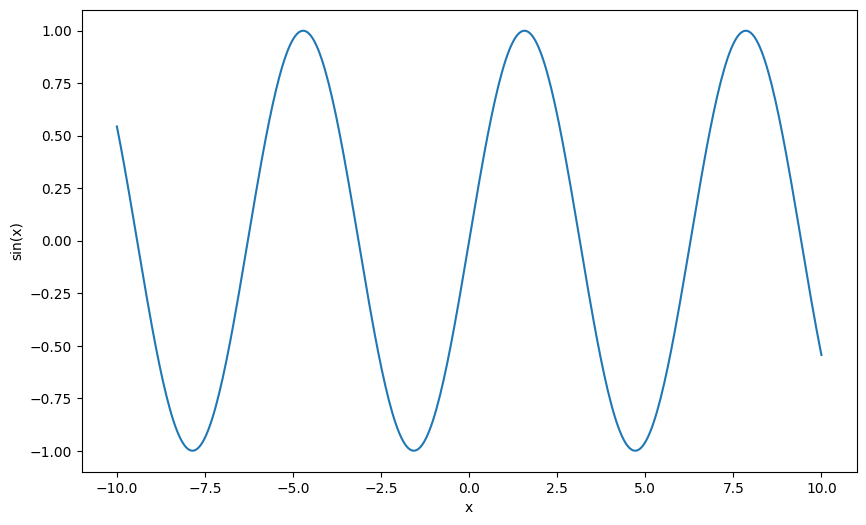

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Defining a continuous function, a simple sine wave in this example
x = np.linspace(-10, 10, 400)
y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

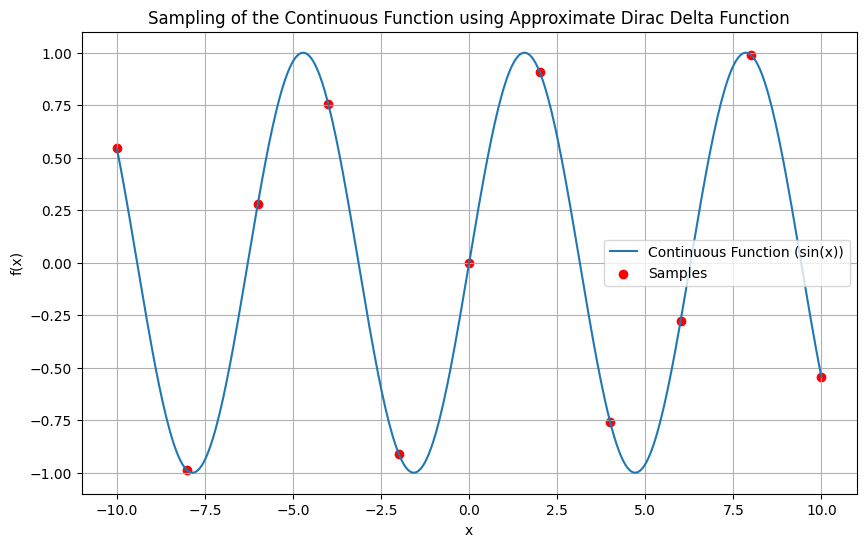

In [3]:
def continuous_function(x):
    return np.sin(x)

def delta_function_approx(x, epsilon=0.01):
    # Approximation of the Dirac Delta function using a narrow Gaussian.
    return np.exp(-x**2 / (2 * epsilon**2)) / (np.sqrt(2 * np.pi) * epsilon)

def sample_function(func, points, epsilon=0.01):
    # Sample a function using the approximate Dirac Delta function.
    sampled_values = []
    for point in points:
        # Approximate the integral using a sum over a narrow range around the point
        x_range = np.linspace(point - epsilon, point + epsilon, 100)
        weights = delta_function_approx(x_range - point, epsilon)
        sampled_values.append(np.sum(func(x_range) * weights) / weights.sum())
    return np.array(sampled_values)

# Define sampling points
sampling_points = np.arange(-10, 11, 0.1) # Sampling every 0.1 units

# Sample the continuous function using the approximate Dirac Delta function
samples = sample_function(continuous_function, sampling_points)

# Plot the original function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Continuous Function (sin(x))')

# Plot the samples on the original plot
plt.scatter(sampling_points, samples, color='red', label='Samples')
plt.title('Sampling of the Continuous Function using Approximate Dirac Delta Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

### Introduction to Fourier Analysis <a name="fourier-intro"></a>

Fourier Analysis is a cornerstone in applied mathematics, and represents one of the marvelous achievements of "modern" mathematics. This analytical method allows us to decompose complex signals into constituent frequencies (in our context this would typically be a recording of temporal sequences in neuroscientific experiments). 

At its core, Fourier Analysis involves transforming time-domain signals (such as EEG data) into a frequency domain. This transformation is achieved through the application of the Fourier Transform, a mathematical operation that translates a time-based signal into a series of frequencies, known as the Fourier Series. This process is akin to translating a signal from one language (time) to another (frequency), offering a different perspective to interpret the underlying processes. 

*Side Note*: many of the mathematics techniques you will use in your life sciences careers are concerns with translating data from one space to another. In most instances, this can be thought of as creating a mapping of the data to a new coordinate system. Dimensionality reduction techniques such as Principal Component Analysis (another cornerstone in applied mathematics) are concerned with mapping data to a lower-dimensional coordinate space. The Fourier Transform is concerned with mapping data from the time space to the frequency space.

Fourier Analysis is not limited to the time-frequency domain translation. It encompasses a broader range of transformations, including space to wave number (x ↔ k), facilitated by the Fourier Transform. This versatility makes Fourier Analysis an indispensable tool in the arsenal of techniques for analyzing complex biological signals. 

The analytical power of Fourier Analysis lies in its ability to simplify the interpretation of complex signals by decomposing them into fundamental components. This decomposition not only aids in understanding the signal characteristics but also facilitates further signal processing techniques, such as filtering and noise reduction, crucial in neuroscientific research.

### Orthogonality and Its Role in Fourier Analysis <a name="orthogonality"></a>

Before delving into Fourier Analysis, it's crucial to understand the concept of **orthogonality**. A common example of orthogonality is observed with the classic vectors $\vec{x}$ and $\vec{y}$ in a 2D coordinate system. These vectors are orthogonal, meaning they are perpendicular to each other. This orthogonal relationship allows us to represent any point in a 2D space by a combination of these two vectors. 

For instance, consider a point on the 2D plane (−3, 4). It can be represented as a combination of the $\vec{x}$ and $\vec{y}$ vectors:

$
\vec{x} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad 
\vec{y} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad 
(-3,4) = -3 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 4 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$

To verify that $\vec{x}$ and $\vec{y}$ are orthogonal, we check if their dot product is zero:

$
\vec{x} \cdot \vec{y} = 1 \cdot 0 + 0 \cdot 1 = 0
$

In Fourier Analysis, we extend the concept of orthogonality to the space of functions. Specifically, we use sine and cosine functions as our orthogonal 'vectors' to span the space of all functions with a single argument \( x \). In this context, sine and cosine functions are orthogonal to each other under a different multiplication rule, which is integral-based rather than the dot product.

Fourier Analysis allows us to represent any function using only sines and cosines. This is akin to representing points in 2D space with $\vec{x}$ and $\vec{y}$, but now we're representing functions in terms of sine and cosine components. Each function can be thought of as a sum of sine and cosine functions of different amplitudes and frequencies, effectively 'spanning' the space of possible functions. Thus, sines and cosines in Fourier Analysis enable us to represent any function using a new language - that of sinusoidal waveforms.

To confirm the orthogonality of the Sine and Cosine functions we will use to span the Fourier Space, the two functions are multiplied elementwise inside an integral, and integrated over their argument. (*Note*: the boundaries of the integral are currently limited to $[0, 2\pi]$ for reasons that will be covered later). The multiplication rules in our Fourier space are defined by integrating two functions:

$
f(x) \cdot g(x) \equiv \int_{0}^{2\pi} f(x)g(x)dx \quad
$

Using $\delta(x), the orthogonality of sine and cosine can be demonstrated by this integral multiplication (the full proof is left to the reader as an exercise):

$
1/2\pi \int_{0}^{2\pi} \cos(nx) \cos(mx)\,dx = \delta_{mn}
$

$
1/\pi \int_{0}^{2\pi} \sin(nx) \sin(mx)\,dx = \delta_{mn} $&emsp;$ : $&emsp;$ m\neq0
$

$
1/\pi \int_{0}^{2\pi} \sin(nx) \sin(mx)\,dx = 0 $&emsp;$ : $&emsp;$ m=n=0
$

$
\int_{0}^{2\pi} \cos(nx) \sin(mx) \, dx = 0 
$

where ${m, n} \in \mathbb{Z}$ and $\delta_{mn}$ is defined as:

$\begin{aligned}
\delta_{mn} =
\begin{cases}
0, & m \neq n\\
1, & m = n
\end{cases}
\end{aligned}$

Thus, sine and cosine, being confirmed as orthogonal functions in our Fourier space, will be useful for us in spanning the space.

### Fourier Series <a name="fourier-series"></a>

All the pieces are now in place, and we can begin deriving a Fourier series. A Fourier Series is a way to represent a periodic function as a sum of simple sine and cosine waves. Essentially, it decomposes any periodic function or signal into the weights of sines and cosines at different frequencies. This series is named after Jean-Baptiste Joseph Fourier, who introduced the idea that any periodic function can be represented as a series of trigonometric functions. Fourier Series provide a way to move between time and frequency domains, making it easier to analyze functions that are otherwise complex in the time domain.

We begin with a periodic function $f(t) = f(t+nT)$, where $n \in \mathbb{Z}$. $T$ denotes the period of this function, and can be related to the frequency ($f$) as such: $T=1/f$. 
Angular frequency, typically denoted by the Greek letter omega $\omega$, is a key concept in understanding oscillatory and wave-like phenomena. Angular frequency measures how quickly a periodic function completes a cycle, expressed in radians per unit time. The mathematical relationship between angular frequency and standard frequency (measured in cycles per second or Hertz) is given by:

$
\omega = 2\pi f
$

Where:
- $\omega$ is the angular frequency, measured in radians per second.
- $f$ is the standard frequency, measured in Hertz (Hz) or cycles per second.
- $2\pi$ represents the number of radians in a complete cycle.

Thus, we can express the periodic function $f(t)$ as $f(\omega \tau)$

Mathematically, a Fourier Series of a periodic function $(x)$ with period $T$ is expressed as:

$
f(t) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos\left(\frac{2\pi nx}{T}\right) + b_n \sin\left(\frac{2\pi nx}{T}\right) \right)
$

Where $a_n$ and $b_n$ are coefficients determined by the function $f(x)$.

Swapping in $\omega \tau$ for $T$ produces the following expression for the Fourier Series:

$ f(t) = a_0/2 + \sum_{n=1}^{\infty} a_n \cos{(n \omega t)} + \sum_{n=1}^{\infty} b_n \sin{(n \omega t)}$

In other words, the function can be represented as a constant $a_0/2$ (known as the *direct current*, or DC) plus sine and cosine terms with increasing discreet frequences and different amplitudes. When summing them, they precisely recreate the function $f(t)$.
The proof of this expression is beyond the scope of this class, and is left to the reader if relevant.

#### Determining $a_n$ and $b_n$

To determine the coefficients, we multiply both sides of the equation by $cos(n \omega t)$, and integrate with repect to $t$ over a period of the function ($0$ &rarr; $2\pi$ in our example).

The left side of the equation thus simplifies to:

$
\int_{0}^{2\pi} f(t) \cos(n \omega t) dt
$

While in the right side of the equation, if we explicity define all the summed terms and integrate each one separately, for every term of the following shape:

$
1/\pi \int_{0}^{2\pi} \cos(n \omega t) \cos(n \omega t) dt = \begin{cases} 0, & m \neq n\\ 1, & m = n \end{cases}
$

While every term of the following shape evaluates to zero:

$
\int_{0}^{2\pi} \cos(n \omega t) \sin(n \omega t) dt = 0
$

Thus, for $m = n$, 

$
a_n \int_{0}^{2\pi} \cos ^2 (n \omega t) dt = \pi a_n
$

$
\implies a_n = 1/\pi \int_{0}^{2\pi} f(t) \cos(n \omega t) dt
$

Similarly, by integrating both sides of the original equation with $\sin(n \omega t)dt$, we can derive an expression for $b_n$:

$
b_n = 1/\pi \int_{0}^{2\pi} f(t) \sin(n \omega t) dt
$

This expression demonstrates that the DC term $a_0/2$ is simply the average of the function over its period:

$
1/2 a_0 = 1/\pi \int_{0}^{2\pi} f(t) \cos(0 \omega t) dt
$

$
\implies 1/2 a_0 = 1/2\pi \int_{0}^{2\pi} f(t) dt
$

The sine and cosine waves are superimposed on this value. If the function is symmetric about the x-axis, the DC is 0, indicating that the average is 0.

#### Complex Fourier Series
Oftentimes, it is beneficial to think of a Fourier series as being composed of complex elements, as opposed to $a_0$, $a_n$, and $b_n$.
We define a complex Fourier series as follows:

$
f(t) = \sum_{n=-\infty}^{\infty} c_n e^{in\omega t} $ &emsp; ; &emsp; $ c_n = \frac{1}{T} \int_{0}^{T} f(t) e^{-in\omega t} \, dt
$

Where: 

- $c_n$ are the complex Fourier coefficients.
- $e^{jn\omega t}$ is the complex exponential function.
- $n$ is an integer that ranges from $-\infty$ to $\infty$.
- $i$ is the imaginary unit.

The complex coefficients contain information about the amplitude and phase of the sinusoidal components at different frequencies.

Notice the differences between this expression, and the one for the simple Fourier series. In the complex series, the sum's limits range from $-\infty$ to $\infty$. Additionally, the sine and cosine terms have been replaced with the complex exponential, using Euler's formula:

$
e^{ix} = \cos(x) + i\sin(x)
$

### Even and Odd Functions <a name="even-odd"></a>

An important concept in the study of functions, particularly when analyzing their Fourier series, is the distinction between odd and even functions. An **even function** exhibits symmetry about the y-axis. This means that the function's graph remains unchanged if reflected along the y-axis. Mathematically, a function $f(x)$ is even if:

$
f(x) = f(-x) \quad \text{for all } x
$

In simpler terms, the function has the same values at $x$ and $-x$. As a result, the behavior of the function from $x = 0$ to $x \rightarrow \infty$ is mirrored from $x = 0$ to $x \rightarrow -\infty$.

Conversely, an **odd function** is symmetric about the origin. This symmetry implies that if the function is rotated 180 degrees about the origin, it will overlap with its original graph. For a function $f(x)$, this is mathematically expressed as:

$
f(x) = -f(-x) \quad \text{for all } x
$

In essence, the values of the function at $x$ and $-x$ are opposite in sign and equal in magnitude. The graph of an odd function is reflected across the x-axis when examining its negative part, showing symmetry about the origin.

One important implication, is that every function can be decomposed into its even and odd parts:

$
f(t) = f_{odd}(t) + f_{even}(t)
$

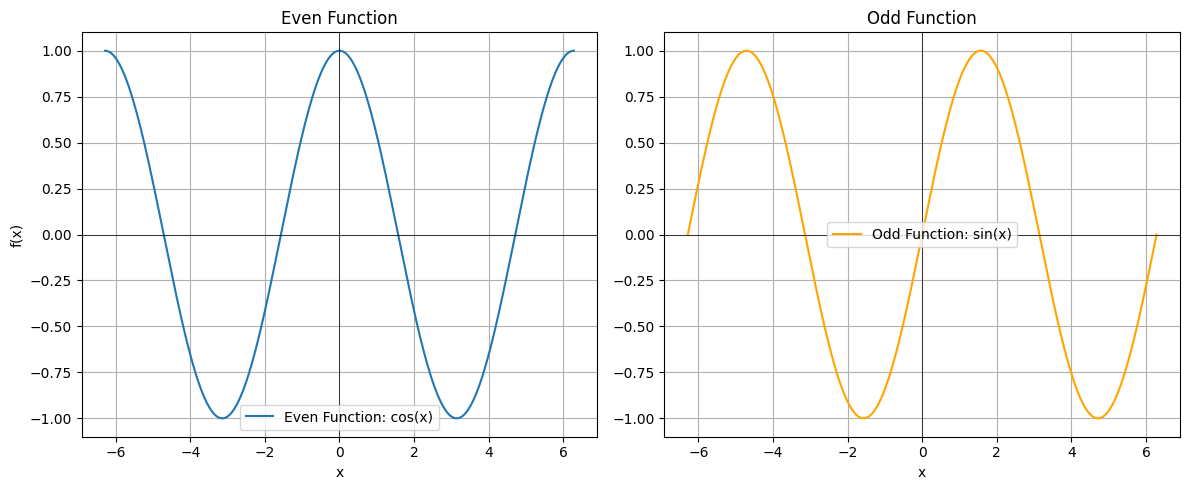

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of x values from -2pi to 2pi
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)

# Even function: cosine
y_even = np.cos(x)

# Odd function: sine
y_odd = np.sin(x)

# plot the even function
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(x, y_even, label='Even Function: cos(x)')
plt.title('Even Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()

# plot the odd function
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(x, y_odd, label='Odd Function: sin(x)', color='orange')
plt.title('Odd Function')
plt.xlabel('x')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

This means that by examining a function, we can determine if it can be represented with either cosine or sine terms only. If this is the case, deriving the Fourier Series of such a function becomes quite simple. Because an odd function will only be composed of sine terms, all of the $a_n$ terms in its Fourier series are equal to 0. 

As an example of this principle, we will find the Fourier series of an odd function, in this case a square wave of height $h$:

$
f(x) = \begin{cases} 
h & \text{for } 0 < x < \pi \\
-h & \text{for } \pi < x < 2\pi 
\end{cases}
$

The coefficients of the Fourier series are given by: 

$
a_n = \frac{1}{\pi} \left[ h \int_0^\pi \cos n\omega tdt - h\int_\pi^{2\pi} \cos n\omega t dt
\right] = 0
$

<br>
and
<br>

$
\begin{aligned}
b_n & = \frac{1}{\pi} \left[ h \int_0^\pi \sin n\omega t dt - h\int_\pi^{2\pi} \sin n\omega t
dt \right]\\
& = \frac{h}{n\pi} \left[ \left( \cos n\omega t \right)_\pi^0 + \left( \cos n\omega t
\right)_\pi^{2\pi} \right] \\
& = \frac{h}{n\pi} \left[ (1-\cos n\omega\pi) + (1 - \cos n\omega \pi) \right]
\end{aligned}
$

Thus:

$
b_n = \begin{cases} 
0 & \text{when n is even } \\
{4h}/{n\pi} & \text{when n is odd }
\end{cases}
$


The final "translation" of the original square wave function after eliminating all cosines (due to $a_n$) is:

$
\hat{f}(t) = {4h}/{\pi} \left( \sin \omega t + \frac{\sin 3\omega t}{3} + \frac{\sin
5\omega t}{5} + \ldots \right)
$

Each term in this equation is called a **harmonic component** of the signal. As more and more terms are added, the series more closely captures the shape of the square function being modeled. An animation of this principle is provided below. Try increasing and decreasing the number of harmonic components to see how the series models the square wave function.

In [11]:
from IPython.display import IFrame
IFrame("https://tomasboril.cz/fourierseries3d/en/", 900,500)

### Discreet Fourier Transform <a name="discreet-FT"></a>

Having discussed the mathematical definitions of a Fourier series, we can now move on to the **Fourier Transform**, a complete mathematical tool that turns any signal into a function of its frequencies. This operation decomposes any function (not necessarily a periodic one) into a different "plane", or coordinate system. This new plane is spanned with the frequencies $2 \pi f $ &harr; $\omega$, instead of "time" ($t$).

In other words, if we take a function expressed in the time plane (or a "signal", as we often call it) and do a Fourier Transform on it, we receive a new function with its argument being the frequency $\omega$. This new function can, in turn, be transformed back into the original time plane by using the Inverse Fourier Transform.

This week, we will be concerned with the Discreet Fourier Transform, transforms a discrete signal, sampled at $N$ points, $dt$ apart, into the frequency domain.
As we covered in the sampling section of this notebook, we can take a continuous signal and sample it at discreet time points, to create a discreet signal.

Let $f(t)$ be the continuous signal which is the source of the data. In the discrete world, the function will be denoted as $f[0], f[1], ..., f[N-1]$.

The expression for the continuous Fourier Transform is given by:

$
F(\omega)=\frac{1}{2\pi}\int_{-\infty}^{\infty}{f(t)e^{-i\omega t}}dt
$

And the inverse Fourier Transform by:

$
f(t) = \int_{-\infty}^{\infty}{F(\omega) e^{i\omega t} dt}
$

Thus, the expression for the Discreet Fourier Transform is given as follows:

$
F(\omega) = \int_0^{(N-1)dt}{f(\tau)e^{-i \omega \tau} d\tau}
$

$
= f[0]e^{-i0} + f[1]e^{-i\omega dt} + ... + f[k]e^{-i \omega k dt} + ... + f[N-1]e^{-i\omega(N-1)dt}
$

Or in other words:

$
F(\omega) = \sum_{k=0}^{N-1}{f[k]e^{-i \omega k dt}}
$

Why did this happen? It's due to the fact that we're taking every sample and considering it as an impulse. Meaning that we're multiplying all of our samples at the respective $\delta[t]$ function.
**This is not the final transform yet,** though, since we haven't dealt with the $\omega$ term yet.


The discrete transform assumes the data is periodic in the first $[0, N-1]$ bins, so in this sense it's more similar to the Fourier Series.
Now we ask ourselves "can there truly be any $\omega$ available in this sequence?".
The answer is "not really", due to *aliasing*. This idea was briefly mentioned in the first class, and it states that if we try to increase the frequency of a sampled signal, after passing the _Nyquist frequency_ we'll start seeing higher frequencies as if they were lower.

The fact that aliasing and the Nyquist frequency won't let us detect all frequency ranges in a discrete sample is a big deal. The DFT deals with the problem by defining a set of frequencies that will be the _"base vectors"_ for the representations. We define a fundemental frequency relating to one cycle per sequence and all of its harmonics:

$
f_{\text{fundemental}} = \frac{1}{Ndt}\ ; \ \omega_{\text{fundemental}} = \frac{2\pi}{Ndt}
$

And the harmonics:

$
\omega = 0, 1 \times \frac{2\pi}{Ndt}, 2 \times \frac{2\pi}{Ndt}, ,...,n \times \frac{2\pi}{Ndt}, ..., (N-1) \times \frac{2\pi}{Ndt}
$

Resulting in the general expression:

$
F[\omega_k] = \sum_{n=0}^{N-1}{f[n] \exp{(-i \frac{2\pi n \omega_k}{N})}} \ ; \ \omega_k \in [0, N-1]
$


Mind that $\omega_k$ is the equivalent of $\omega$ in the previous transform, i.e. it's the frequency domain's indepenedent variable.

### Example: EEG Data <a name="EEG-Example"></a>

We have covered the basic notions of sampling a continuous function, and then conducting a Discreet Fourier Transform on the samples. However, two important questions remain for our life sciences context:
1. Why is this useful?
2. How can I implement it?

We begin by answering the first question with an example from the domain of neurophysiology. Electroencephalograms (EEG) are a widely-used neurophysiological measurement, which produce a continuous function of voltage across the scalp of an experiment subject. The image below displays two EEG signals: one from an awake subject, and one from an anesthesized subject:

<br>

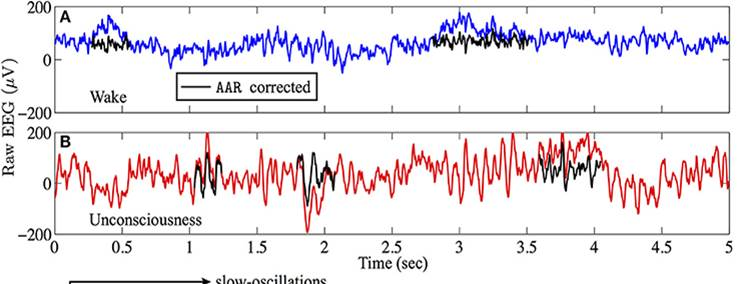

<br>

Clearly, the two signals are different. But **how are they different?** As scientists, we want to **quantify, explain, and visualize** these differences.

The next figure shows the same two signals, but attenuates data below 1.5Hz. 

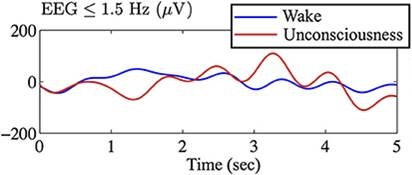

Now we can begin to see some differences. However, we still don't know exactly what the difference is. We see different peaks at different time points, but have no understanding of the frequency domain. **By using the Fourier Transform, we can quantify these differences in the frequency space.**

The following image shows the signals after being transformed with the Fast Fourier Transform.
**Note:** in this course, we will be working only with the Discreet Fourier Transform. However, this example is fundamentally similar, and illustrates the general usefullness of Fourier Transforms.

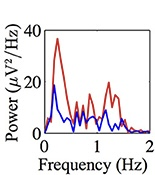

From this frequency spectrum plot, we can see that the unconscious patient's EEG signal displays a peak at 0.2Hz. In fact, the awake patient's EEG signal also displays a peak at 0.2Hz. **However, the amplitude of the peak at 0.2Hz for the unconscious patient is much larger.** We've arrived at a quantification of the difference between the two signals: the anesthesized brain reveals more low-frequency activity, specifically at the 0.2Hz frequency. 